In [3]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
hepatitis_c_virus_hcv_for_egyptian_patients = fetch_ucirepo(id=503)

# data (as pandas dataframes)
X = hepatitis_c_virus_hcv_for_egyptian_patients.data.features
y = hepatitis_c_virus_hcv_for_egyptian_patients.data.targets

# metadata
print(hepatitis_c_virus_hcv_for_egyptian_patients.metadata)

# variable information
print(hepatitis_c_virus_hcv_for_egyptian_patients.variables)


{'uci_id': 503, 'name': 'Hepatitis C Virus (HCV) for Egyptian patients', 'repository_url': 'https://archive.ics.uci.edu/dataset/503/hepatitis+c+virus+hcv+for+egyptian+patients', 'data_url': 'https://archive.ics.uci.edu/static/public/503/data.csv', 'abstract': 'Egyptian patients who underwent treatment dosages for HCV about 18 months. Discretization should be applied based on expert recommendations; there is an attached file shows how.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1385, 'num_features': 28, 'feature_types': ['Real'], 'demographics': ['Age', 'Gender'], 'target_col': ['Baselinehistological staging'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2017, 'last_updated': 'Tue Apr 09 2024', 'dataset_doi': '10.24432/C5989V', 'creators': ['Sanaa Kamal', 'Mohamed ElEleimy', 'Doaa Hegazy', 'Mahmoud Nasr'], 'intro_paper': {'ID': 232, 'type': 'NATIVE', 'ti

In [5]:
#import thư viện
import numpy as np# Thư viện tính toán
import pandas as pd #Thư việ đọc, sử lý số liệu
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
import seaborn as sns #Thư viện cho vẽ hình
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120}) #Cài đặt kích thước cho toàn bộ các hình trong file notebook này giống nhau

In [6]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
hepatitis_c_virus_hcv_for_egyptian_patients = fetch_ucirepo(id=503)

# Combine features (X) and target (y) into one DataFrame
import pandas as pd

# Combine into a single DataFrame for viewing
df = pd.concat([X, y], axis=1)


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Gộp nhóm F1-F4 thành 2 nhóm
def fibrosis_group(stage):
    if stage in [1, 2]:  # Xơ hóa nhẹ
        return 0  # Nhóm 1
    elif stage in [3, 4]:  # Xơ hóa nặng/xơ gan
        return 1  # Nhóm 2
    else:
        return None  # Để xử lý các giá trị thiếu

# Tạo cột mới "Fibrosis_Group" trong dataset
df['Fibrosis_Group'] = df['Baselinehistological staging'].apply(fibrosis_group)


In [9]:
df.to_csv('hepatitis_c_dataset.csv', index=False)

In [10]:
from google.colab import files

# Tải file CSV xuống
files.download('hepatitis_c_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
df.tail(3)

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,Fibrosis_Group
1382,42,1,26,2,2,1,1,1,2,1,...,39,24,612664,572756,806109,343719,160457,6,2,0
1383,52,1,29,2,1,1,2,2,2,1,...,81,43,139872,76161,515730,2460,696074,15,3,1
1384,55,2,26,1,2,2,2,1,2,1,...,71,34,1190577,628730,5,5,5,13,3,1


In [12]:
df.info()
#df.describe() #chỉ xem biến có số
#df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1385 non-null   int64  
 1   Gender                            1385 non-null   int64  
 2   BMI                               1385 non-null   int64  
 3   Fever                             1385 non-null   int64  
 4   Nausea/Vomting                    1385 non-null   int64  
 5   Headache                          1385 non-null   int64  
 6   Diarrhea                          1385 non-null   int64  
 7   Fatigue & generalized bone ache   1385 non-null   int64  
 8   Jaundice                          1385 non-null   int64  
 9   Epigastric pain                   1385 non-null   int64  
 10  WBC                               1385 non-null   int64  
 11  RBC                               1385 non-null   float64
 12  HGB   

In [13]:
df.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,Fibrosis_Group
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462,0.517690
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392,0.499867
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000,0.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000,0.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000,1.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000,1.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000,1.000000


In [14]:
#df.isnull()
df.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Fever,0
Nausea/Vomting,0
Headache,0
Diarrhea,0
Fatigue & generalized bone ache,0
Jaundice,0
Epigastric pain,0


#EDA

In [15]:
# Xem giá trị duy nhất của tất cả cột
#for col in df.columns:
    #print(f"Cột {col}: {df[col].unique()}")

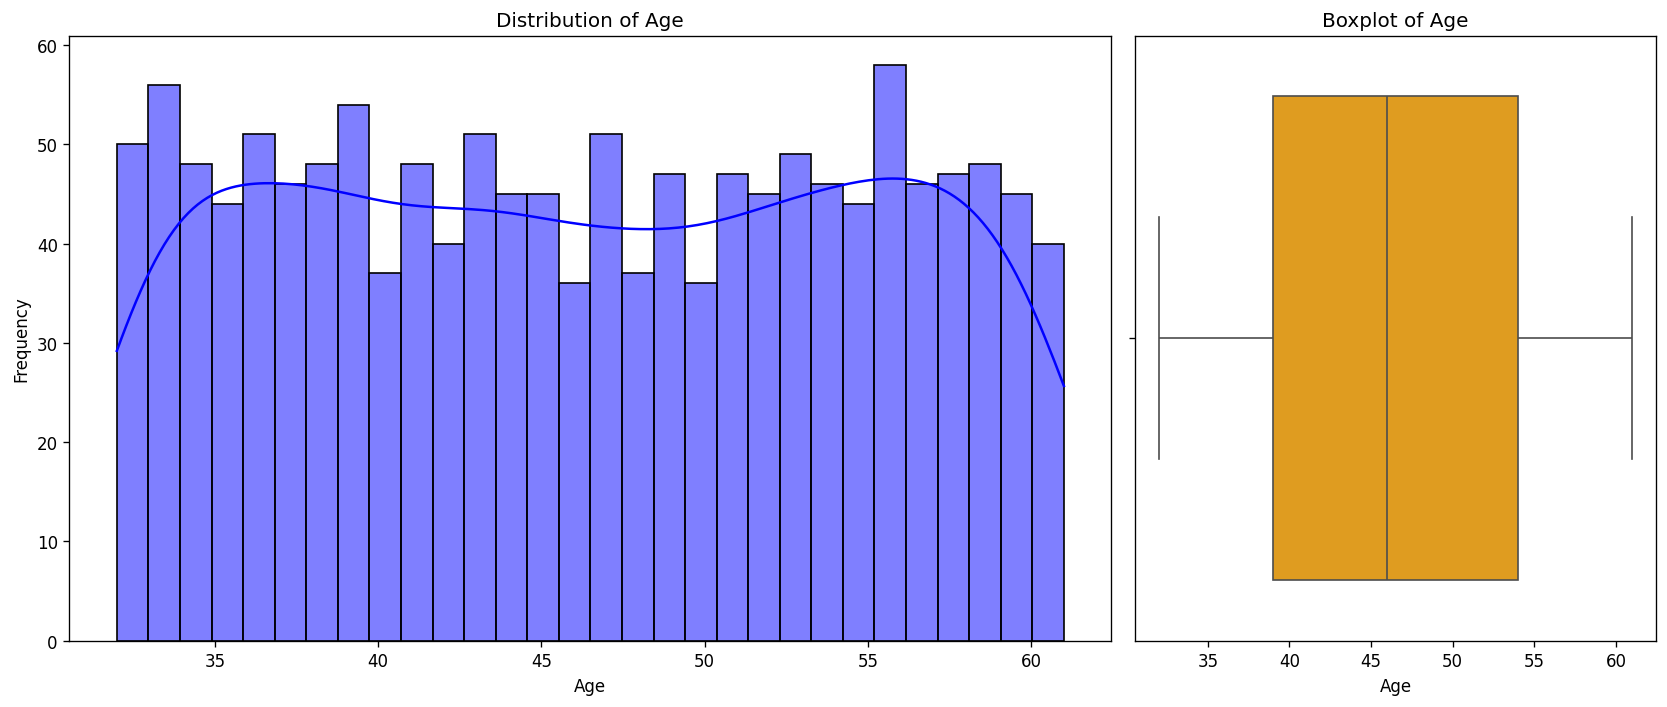

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo figure với 1 hàng và 2 cột, điều chỉnh tỷ lệ cột bằng gridspec_kw
fig, axes = plt.subplots(
    1, 2, figsize=(14, 6),
    gridspec_kw={'width_ratios': [2, 1]}  # Tăng chiều dài biểu đồ 1 (gấp đôi biểu đồ 2)
)

# Biểu đồ Histogram (rộng hơn)
sns.histplot(
    data=df,
    x="Age ",
    kde=True,
    bins=30,
    color="blue",
    ax=axes[0]  # Vẽ vào subplot đầu tiên
)
axes[0].set_title("Distribution of Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

# Biểu đồ Boxplot (hẹp hơn)
sns.boxplot(
    data=df,
    x="Age ",
    color="orange",
    ax=axes[1]  # Vẽ vào subplot thứ hai
)
axes[1].set_title("Boxplot of Age")
axes[1].set_xlabel("Age")

# Tăng khoảng cách giữa các biểu đồ để không bị chồng lấn
fig.tight_layout()

# Hiển thị toàn bộ figure
plt.show()


/tmp/ipython-input-3369944861.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="Set2"


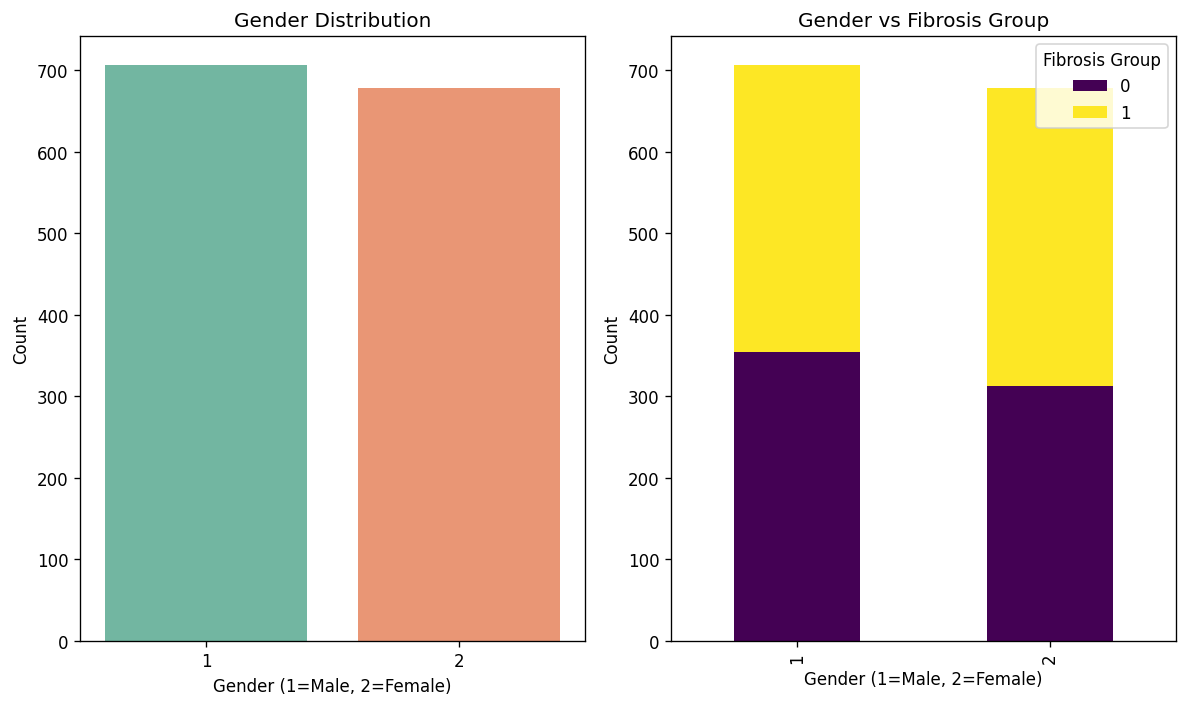

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo một figure với 1 hàng và 2 cột
fig, axes = plt.subplots(1, 2, figsize=(10, 6))  # 1 hàng, 2 cột

# Bar plot
sns.countplot(data=df, x="Gender", palette="Set2"
,ax=axes[0]  # Vẽ vào subplot đầu tiên
)
axes[0].set_title("Gender Distribution")
axes[0].set_xlabel("Gender (1=Male, 2=Female)")
axes[0].set_ylabel("Count")

# Stacked bar plot với `Fibrosis_Group`
gender_fibrosis = df.groupby(["Gender", "Fibrosis_Group"]).size().unstack()
gender_fibrosis.plot(kind="bar",
stacked=True,
colormap="viridis",ax=axes[1]  # Vẽ vào subplot thứ hai
)
axes[1].set_title("Gender vs Fibrosis Group")
axes[1].set_xlabel("Gender (1=Male, 2=Female)")
axes[1].set_ylabel("Count")
axes[1].legend(title="Fibrosis Group")

# Tăng khoảng cách giữa các biểu đồ để không bị chồng lấn
fig.tight_layout()

# Hiển thị toàn bộ figure
plt.show()


/tmp/ipython-input-3610098846.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


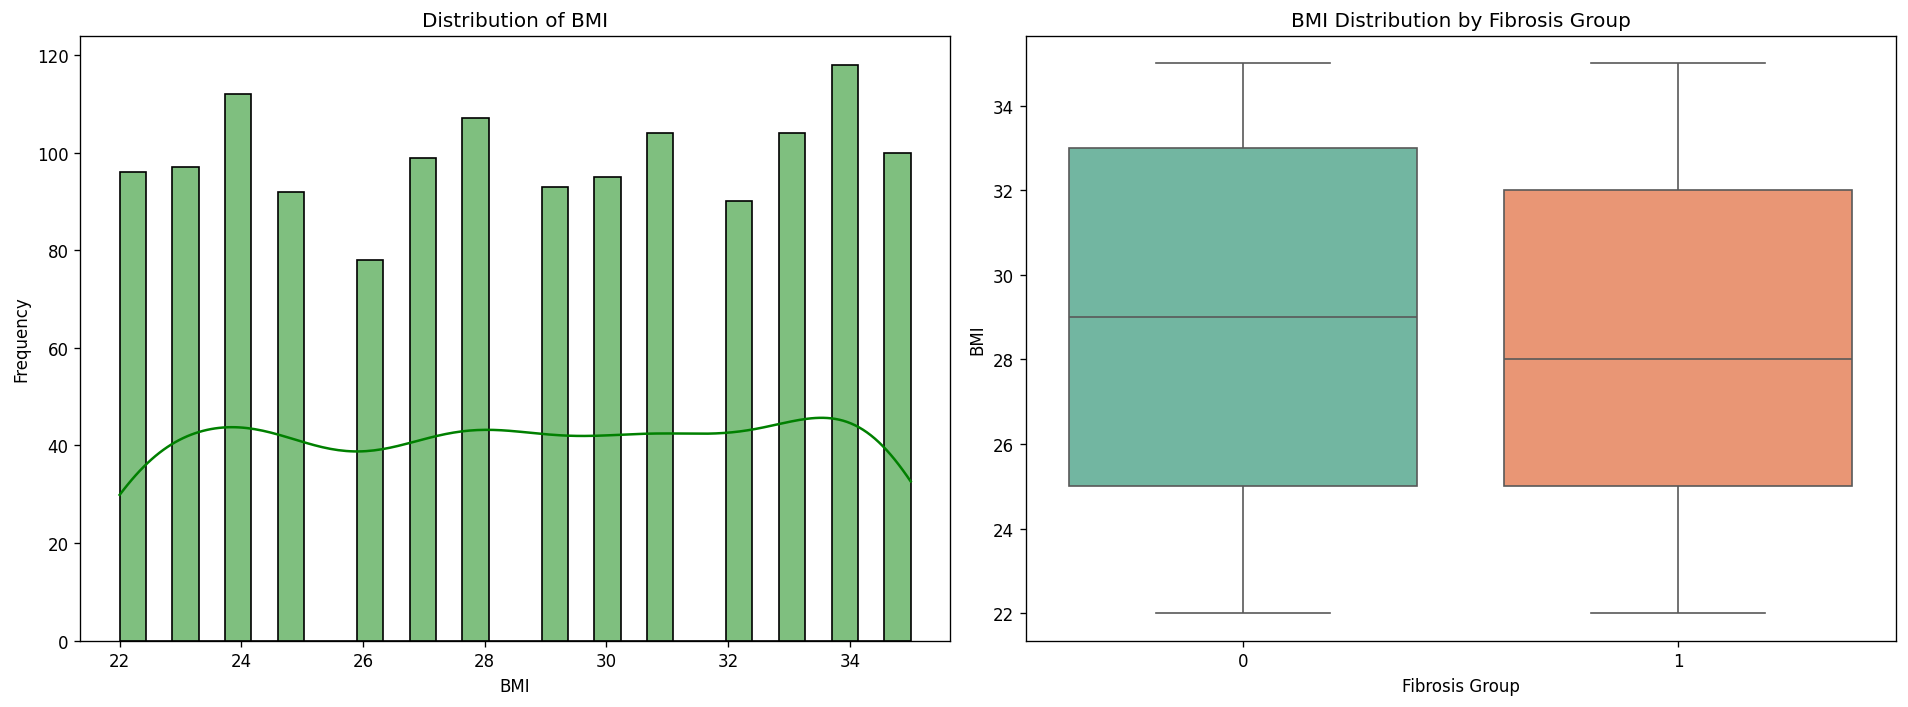

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo một figure với 1 hàng và 2 cột
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 hàng, 2 cột

# Biểu đồ Histogram
sns.histplot(
    data=df,
    x="BMI",
    kde=True,
    bins=30,
    color="green",
    ax=axes[0]  # Vẽ vào subplot đầu tiên
)
axes[0].set_title("Distribution of BMI")
axes[0].set_xlabel("BMI")
axes[0].set_ylabel("Frequency")

# Biểu đồ Boxplot
sns.boxplot(
    data=df,
    x="Fibrosis_Group",
    y="BMI",
    palette="Set2",
    ax=axes[1]  # Vẽ vào subplot thứ hai
)
axes[1].set_title("BMI Distribution by Fibrosis Group")
axes[1].set_xlabel("Fibrosis Group")
axes[1].set_ylabel("BMI")

# Tăng khoảng cách giữa các biểu đồ để không bị chồng lấn
fig.tight_layout()

# Hiển thị toàn bộ figure
plt.show()


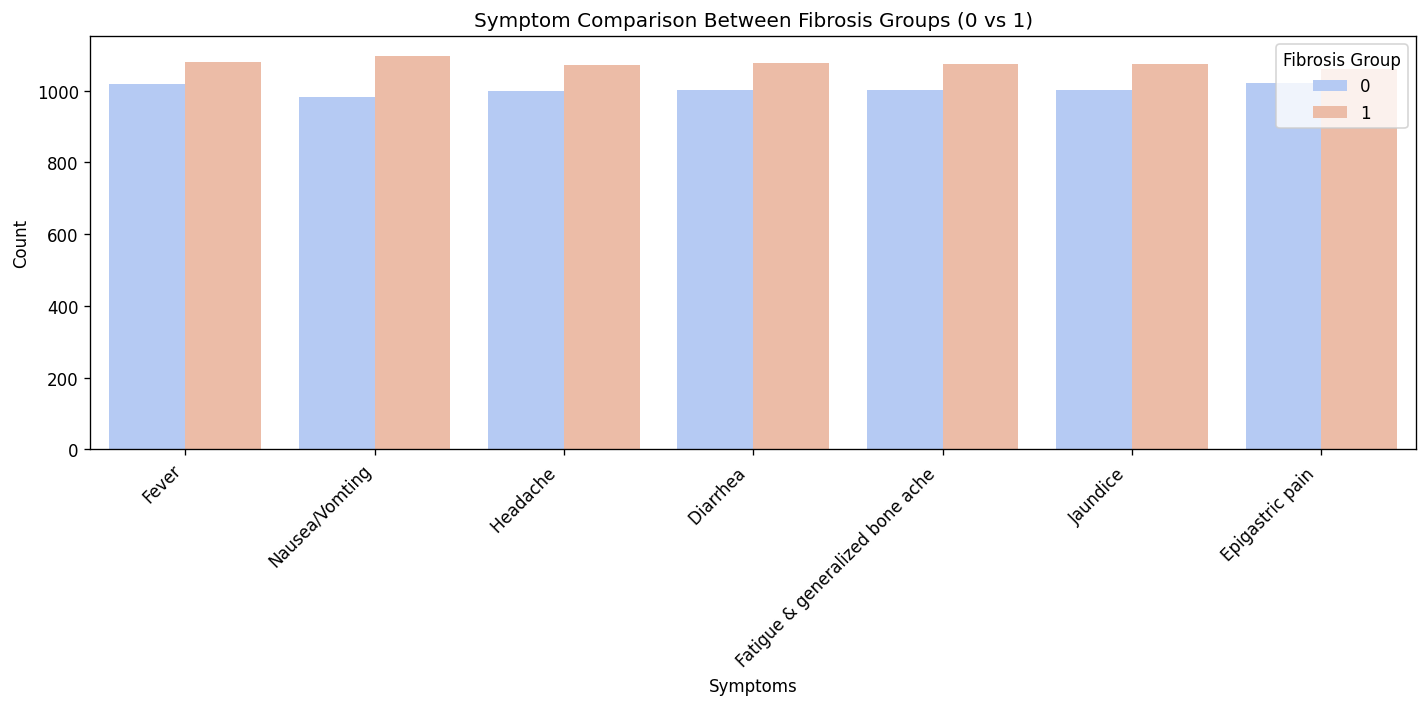

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Danh sách triệu chứng
symptoms = ["Fever", "Nausea/Vomting", "Headache ", "Diarrhea ", "Fatigue & generalized bone ache ", "Jaundice ", "Epigastric pain "]

# Tính tổng số lần xuất hiện triệu chứng cho mỗi nhóm 0 và 1
symptom_counts_by_group = df.groupby("Fibrosis_Group")[symptoms].sum()

# Chuyển dữ liệu sang dạng "long format" để dễ vẽ
symptom_counts_melted = symptom_counts_by_group.T.reset_index().melt(id_vars="index")
symptom_counts_melted.columns = ["Symptom", "Fibrosis_Group", "Count"]

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(data=symptom_counts_melted, x="Symptom", y="Count", hue="Fibrosis_Group", palette="coolwarm")
plt.title("Symptom Comparison Between Fibrosis Groups (0 vs 1)")
plt.xlabel("Symptoms")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Fibrosis Group")
plt.tight_layout()
plt.show()


/tmp/ipython-input-3644796608.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-3644796608.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-3644796608.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-3644796608.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


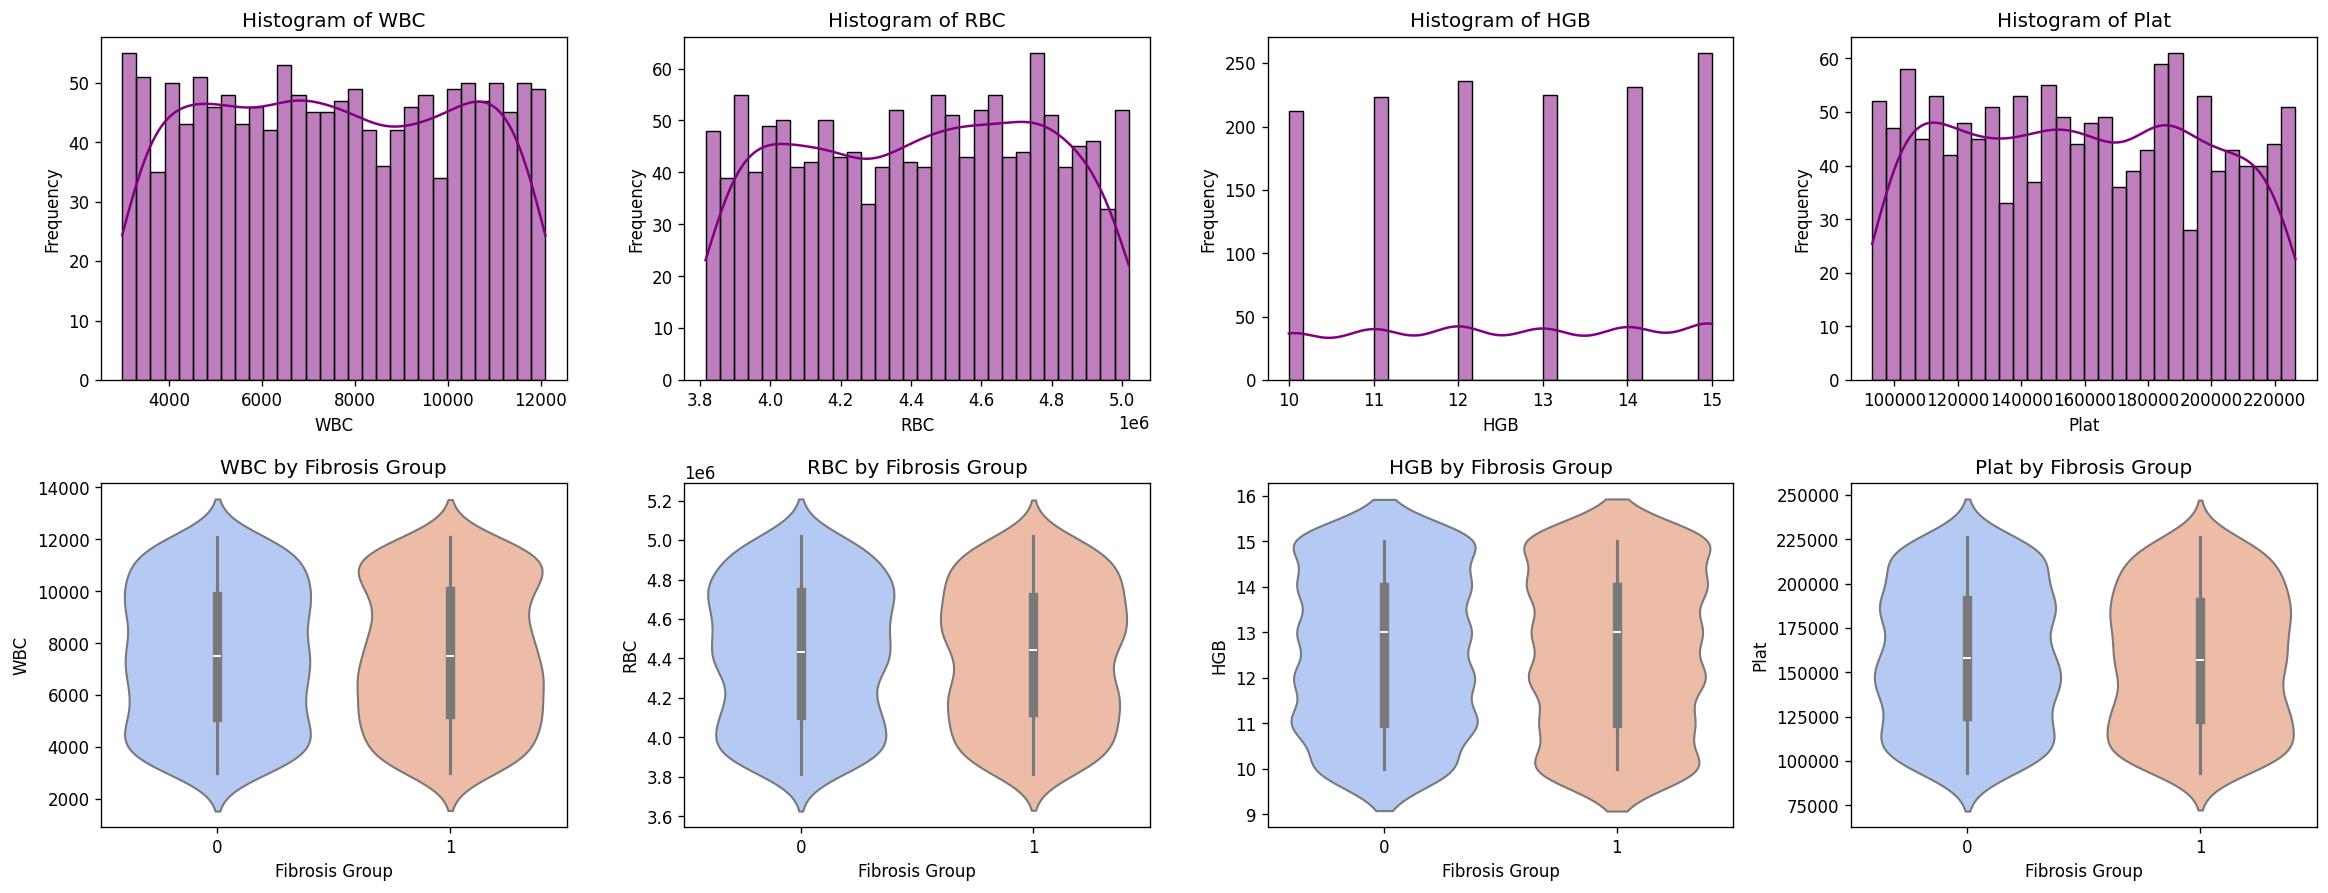

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách chỉ số máu
blood_indices = ["WBC", "RBC", "HGB", "Plat"]

# Tạo figure với 2 hàng, mỗi hàng có 4 biểu đồ
fig, axes = plt.subplots(2, 4, figsize=(20, 8))  # 2 hàng x 4 cột
fig.tight_layout(pad=4)  # Tạo khoảng cách giữa các subplot

# Plot Histogram (hàng 1)
for i, index in enumerate(blood_indices):
    sns.histplot(
        data=df,
        x=index,
        kde=True,
        bins=30,
        color="purple",
        ax=axes[0, i]  # Định nghĩa subplot tại hàng 1, cột i
    )
    axes[0, i].set_title(f"Histogram of {index}")
    axes[0, i].set_xlabel(index)
    axes[0, i].set_ylabel("Frequency")

# Plot Violin plot (hàng 2)
for i, index in enumerate(blood_indices):
    sns.violinplot(
        data=df,
        x="Fibrosis_Group",
        y=index,
        palette="coolwarm",
        ax=axes[1, i]  # Định nghĩa subplot tại hàng 2, cột i
    )
    axes[1, i].set_title(f"{index} by Fibrosis Group")
    axes[1, i].set_xlabel("Fibrosis Group")
    axes[1, i].set_ylabel(index)

# Hiển thị toàn bộ biểu đồ
plt.show()


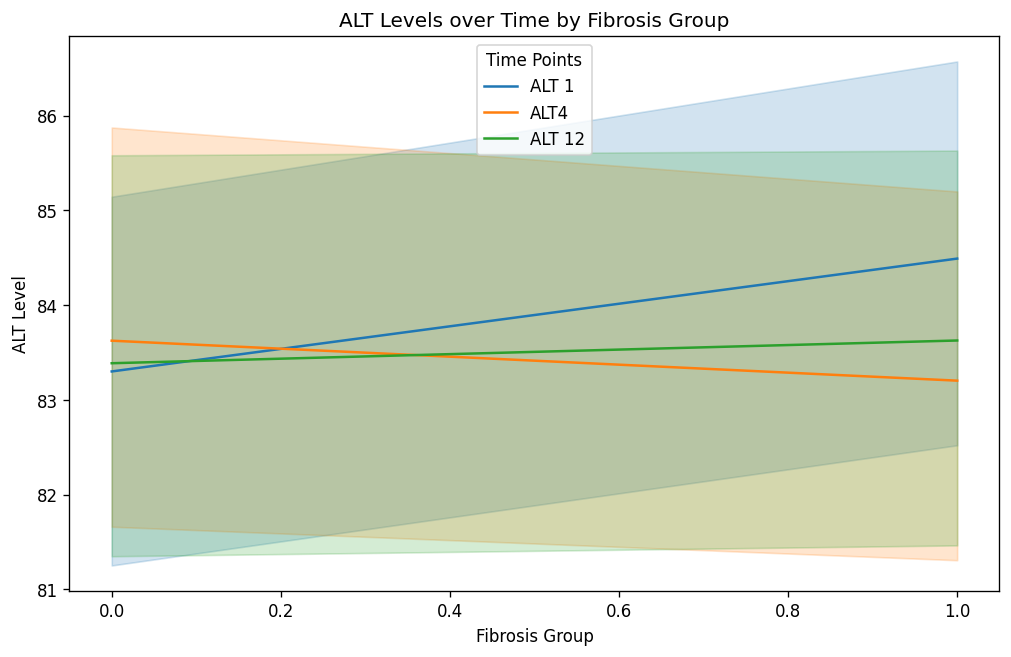

In [21]:
#Histogram: Để xem phân phối của từng chỉ số. Line plot (theo thời gian, ví dụ ALT 1, ALT 4, ALT 12): Để kiểm tra xu hướng thay đổi của chỉ số theo thời gian.Boxplot (với Fibrosis_Group): Để xem sự khác biệt giữa các nhóm bệnh.
#Lý do:Các chỉ số này trực tiếp phản ánh tình trạng gan, do đó có khả năng rất quan trọng trong dự đoán.
time_columns = ["ALT 1", "ALT4", "ALT 12"]  # Thay thế bằng các cột thời gian thực tế

plt.figure(figsize=(10, 6))
for col in time_columns:
    sns.lineplot(data=df, x="Fibrosis_Group", y=col, label=col)
plt.title("ALT Levels over Time by Fibrosis Group")
plt.xlabel("Fibrosis Group")
plt.ylabel("ALT Level")
plt.legend(title="Time Points")
plt.show()


/tmp/ipython-input-3123415150.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Baseline histological Grading", palette="Set2",
/tmp/ipython-input-3123415150.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Baselinehistological staging", palette="Set1",


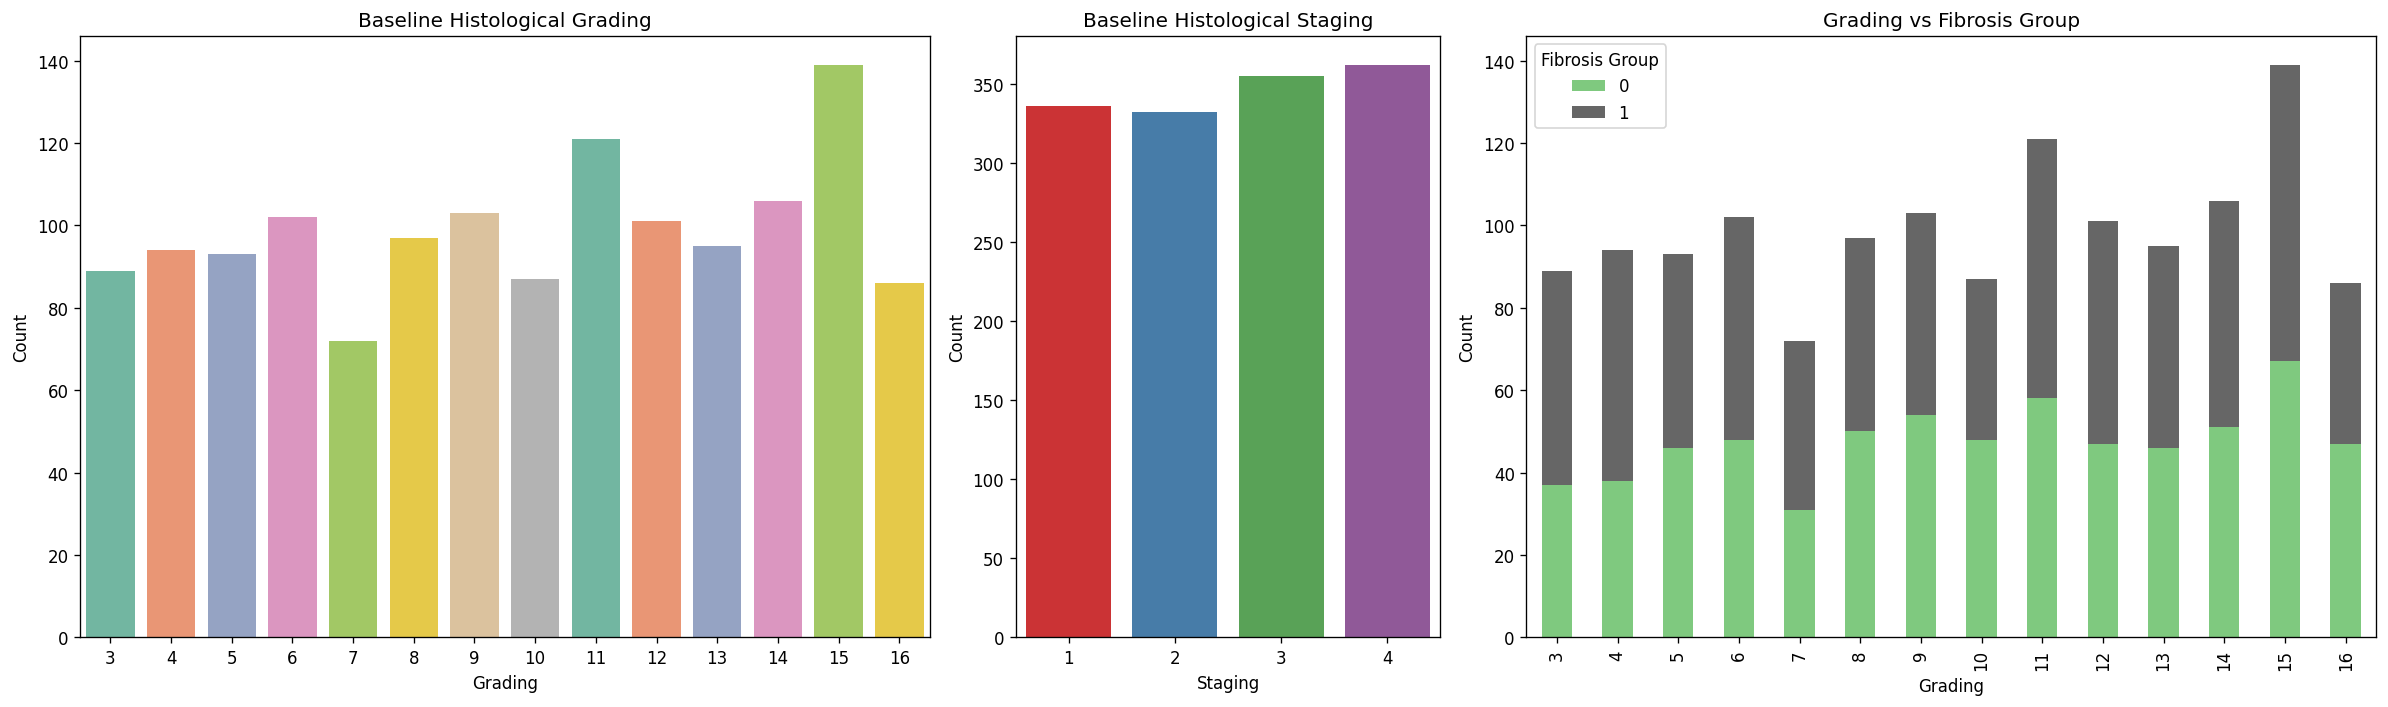

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo figure với 1 hàng và 2 cột, điều chỉnh tỷ lệ cột bằng gridspec_kw
fig, axes = plt.subplots(
    1, 3, figsize=(20, 6),
    gridspec_kw={'width_ratios': [2, 1, 2]}  # Tăng chiều dài biểu đồ 1 (gấp đôi biểu đồ 2)
)

# Biểu đồ 1 Bar plot (rộng hơn)
sns.countplot(data=df, x="Baseline histological Grading", palette="Set2",
    ax=axes[0]  # Vẽ vào subplot đầu tiên
)
axes[0].set_title("Baseline Histological Grading")
axes[0].set_xlabel("Grading")
axes[0].set_ylabel("Count")

# Biểu đồ Bar plot 2 (hẹp hơn)
sns.countplot(data=df, x="Baselinehistological staging", palette="Set1",
    ax=axes[1]  # Vẽ vào subplot thứ hai
)
axes[1].set_title("Baseline Histological Staging")
axes[1].set_xlabel("Staging")
axes[1].set_ylabel("Count")

# Biểu đồ3  Stacked bar plot với `Fibrosis_Group` (rộng hơn)
grading_fibrosis = df.groupby(["Baseline histological Grading", "Fibrosis_Group"]).size().unstack()
grading_fibrosis.plot(kind="bar", stacked=True, colormap="Accent",
    ax=axes[2]  # Vẽ vào subplot thứ ba
)
axes[2].set_title("Grading vs Fibrosis Group")
axes[2].set_xlabel("Grading")
axes[2].set_ylabel("Count")
axes[2].legend(title="Fibrosis Group")
# Tăng khoảng cách giữa các biểu đồ để không bị chồng lấn
fig.tight_layout()

# Hiển thị toàn bộ figure
plt.show()


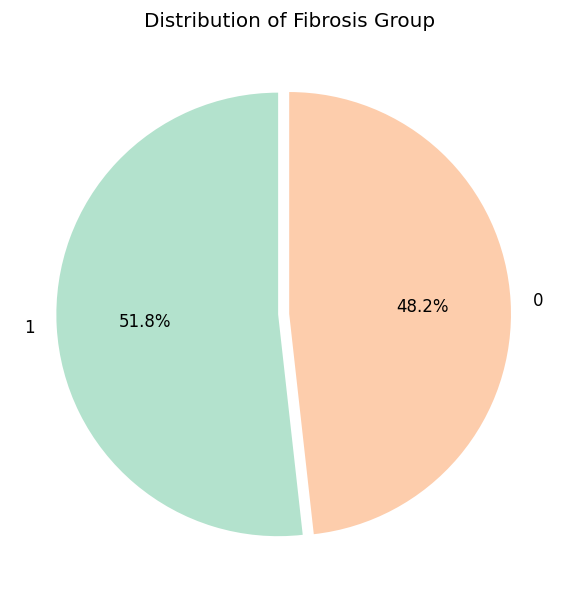

In [23]:
import matplotlib.pyplot as plt

# Tính toán số lượng từng nhóm trong cột "Fibrosis_Group"
group_counts = df["Fibrosis_Group"].value_counts()

# Vẽ Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(
    group_counts,
    labels=group_counts.index,
    autopct='%1.1f%%',  # Hiển thị phần trăm
    startangle=90,      # Bắt đầu từ góc 90 độ
    colors=plt.cm.Pastel2.colors,  # Sử dụng bảng màu pastel
    explode=(0.05, 0)  # Tách nhẹ nhóm đầu tiên ra để làm nổi bật
)
plt.title("Distribution of Fibrosis Group")
plt.show()


In [24]:
#sns.heatmap(df.corr(),annot=False)

Đường chéo chính:Luôn có giá trị là 1 vì mỗi biến được so sánh với chính nó (tương quan hoàn hảo).

"Baseline histological staging":Cột cuối cùng và hàng cuối cùng đại diện cho biến "Baseline histological staging".
Từ biểu đồ, có vẻ như biến này có mối tương quan khá mạnh với một số RNA (các RNA Base, RNA 12, RNA EF).

Các biến RNA:Nhóm biến "RNA Base", "RNA 12", và "RNA EF" dường như có tương quan cao với nhau (khu vực sáng ở góc dưới bên phải).

Tương quan yếu giữa các biến khác:Ngoài nhóm RNA và "Baseline histological staging", các biến còn lại (như "Age", "BMI", "ALT", "AST") có mối tương quan khá yếu với nhau (màu tối).

=> Các mối liên hệ tiềm năng:Biến "Baseline histological staging" có thể phụ thuộc đáng kể vào các RNA, và có thể được sử dụng trong các mô hình dự đoán liên quan.Các biến như "Age" và "BMI" không có mối tương quan cao với các biến khác, nên có thể đóng vai trò yếu trong dự đoán nếu chỉ dựa vào tương quan.

#Chia dữ liệu và xây dựng mô hình

In [25]:
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)  # X là DataFrame chứa các biến cần chuẩn hóa

# Chuyển đổi thành DataFrame để dễ xem
import pandas as pd
X_scaled = pd.DataFrame(data_scaled, columns=X.columns)
print(X_scaled.head())


       Age     Gender       BMI     Fever  Nausea/Vomting  Headache   \
0  1.102814 -0.979276  1.568525  0.969420       -1.005067  -0.992089   
1 -0.036355 -0.979276  0.096039 -1.031544        0.994959   1.007974   
2  1.216730 -0.979276  1.077696  0.969420        0.994959   1.007974   
3  0.305396  1.021163  1.077696 -1.031544        0.994959  -0.992089   
4  1.444564 -0.979276  0.832282 -1.031544       -1.005067   1.007974   

   Diarrhea   Fatigue & generalized bone ache   Jaundice   Epigastric pain   \
0  -1.005067                          1.002168   0.997836          0.992089   
1  -1.005067                          1.002168   0.997836         -1.007974   
2   0.994959                         -0.997836  -1.002168         -1.007974   
3   0.994959                         -0.997836   0.997836         -1.007974   
4  -1.005067                          1.002168   0.997836          0.992089   

   ...    ALT 24    ALT 36    ALT 48  ALT after 24 w  RNA Base     RNA 4  \
0  ... -0.103412

In [26]:
y = df['Fibrosis_Group']
X = X_scaled
#Chia dữ liệu thành training set và test set. Thư viện hỗ trợ chia data thành train và test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score #GridSearchCV: Công cụ tìm kiếm tham số tốt nhất cho một mô hình dựa trên các giá trị lưới được định nghĩa trước.
#cross_val_score: Để tính toán điểm số trung bình trên các tập phân chia trong cross-validation.
import datetime
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#Logistic Regression

In [28]:
#1 Import mô hình LogisticRegression gán cho biến "model"
model = LogisticRegression()
#2.Training model với training set
model.fit(X_train, y_train) #Training model
y_pred = model.predict(X_test) #Dự báo cho tập test

In [29]:
model.coef_

array([[-0.04975274,  0.06345772, -0.12184601, -0.01718352,  0.15808921,
        -0.01534442,  0.00326339, -0.03339751, -0.0202405 , -0.10709463,
         0.0514106 ,  0.01955537,  0.0665925 , -0.02788506,  0.02604417,
         0.06098681,  0.04170667,  0.00258382, -0.02795646,  0.07293479,
        -0.07057204,  0.16068759,  0.02755902, -0.00486695,  0.03606579,
        -0.10132562,  0.10203032, -0.03837917]])

In [30]:
#Đánh giá mô hình
accuracy_score(y_test, y_pred) #Tính độ chính xác của mô hình

0.5024038461538461

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.36      0.42       214
           1       0.49      0.66      0.56       202

    accuracy                           0.50       416
   macro avg       0.51      0.51      0.49       416
weighted avg       0.51      0.50      0.49       416

Confusion Matrix:
[[ 76 138]
 [ 69 133]]


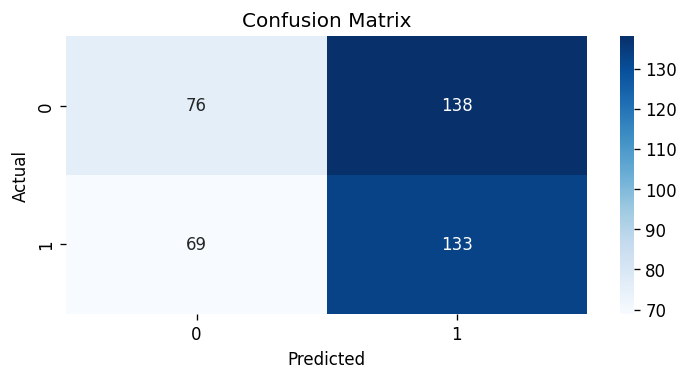

In [32]:
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Vẽ biểu đồ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Mô hình thường nhầm lẫn lớp 1 thành lớp 3 (40 lần).
Lớp 2 cũng bị nhầm lẫn thành lớp 3 nhiều nhất (50 lần).
Có xu hướng dự đoán nhiều mẫu thành lớp 3, dẫn đến sự thiên lệch của mô hình.

In [33]:
#Phân cụm (Clustering) để kiểm tra phân tách giữa các lớp
#from sklearn.decomposition import PCA
#import matplotlib.pyplot as plt

# Giảm chiều dữ liệu xuống 2D bằng PCA
#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X)

# Vẽ biểu đồ scatter
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
#plt.colorbar(label="Class")
#plt.title("PCA of Features")
#plt.xlabel("Principal Component 1")
#plt.ylabel("Principal Component 2")
#plt.show()
#các lớp bị chồng lấn nhiều trong không gian giảm chiều, các đặc trưng hiện tại không đủ phân biệt giữa các lớp.

#Decision Tree Classifier

In [34]:
from sklearn import tree #Gọi mô hình và training đơn giản như các thuật toán đã học ở bài trước
model_tree = tree.DecisionTreeClassifier(max_depth=2,random_state=1)  #Set max_depth bất kỳ
model_tree.fit(X_train, y_train) #Training mô hình

DecisionTreeClassifier(max_depth=2, random_state=1)

In [35]:
#Đánh giá độ chính xác của mô hình
y_pred=model_tree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) #Độ chính xác của DT

0.46875

Accuracy: 0.47
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.57      0.53       214
           1       0.44      0.36      0.39       202

    accuracy                           0.47       416
   macro avg       0.46      0.47      0.46       416
weighted avg       0.46      0.47      0.46       416

Confusion Matrix:
[[123  91]
 [130  72]]


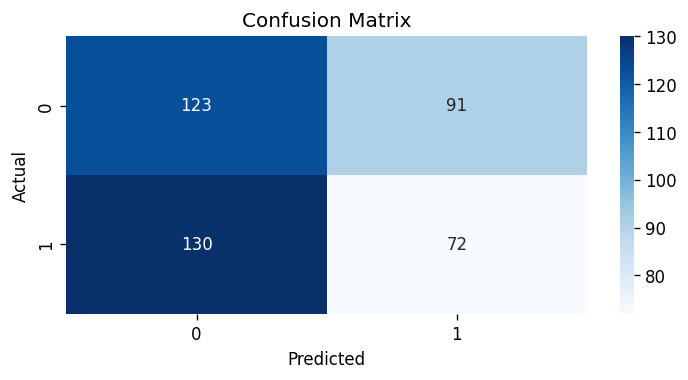

In [36]:
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Vẽ biểu đồ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Sử dụng vòng lặp for để tìm max_depth
score_total=[]
for i in range(1,20):
  model_tree = tree.DecisionTreeClassifier(max_depth=i,random_state=1)
  model_tree.fit(X_train, y_train)
  y_pred=model_tree.predict(X_test)
  score_total.append(accuracy_score(y_test,y_pred))

In [38]:
score_total

[0.4639423076923077,
 0.46875,
 0.46875,
 0.44711538461538464,
 0.4807692307692308,
 0.5024038461538461,
 0.5144230769230769,
 0.4831730769230769,
 0.5120192307692307,
 0.5192307692307693,
 0.5144230769230769,
 0.5048076923076923,
 0.5192307692307693,
 0.5120192307692307,
 0.5384615384615384,
 0.5144230769230769,
 0.5168269230769231,
 0.5168269230769231,
 0.5168269230769231]

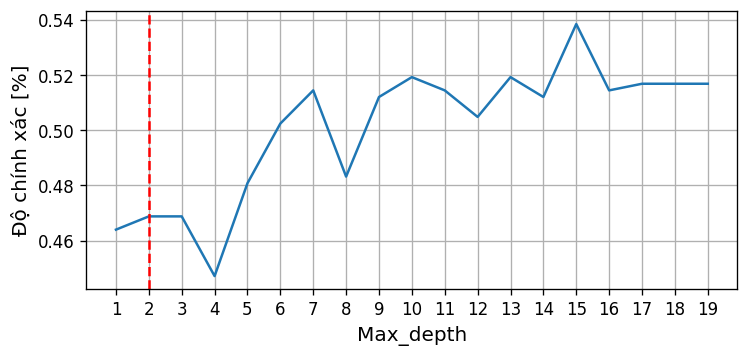

In [39]:
from sklearn import tree #Gọi mô hình và training đơn giản như các thuật toán đã học ở bài trước
model_tree = tree.DecisionTreeClassifier(max_depth=4,random_state=1)
model_tree.fit(X_train, y_train)
y_pred=model_tree.predict(X_test)
#Vẽ hình thể hiện độ chính xác theo giá trị max_depth
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})
plt.ylabel('Độ chính xác [%]',fontsize=12)
plt.xlabel('Max_depth',fontsize=12)
plt.plot(range(1, 20), score_total)
plt.xticks(range(1, 20))
plt.axvline(x=2, color='r', linestyle='--')
plt.grid('minor')

chọn max-depth = 15

In [40]:
model_tree = tree.DecisionTreeClassifier(max_depth=15,random_state=1)

Accuracy: 0.45
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.50      0.48       214
           1       0.42      0.39      0.40       202

    accuracy                           0.45       416
   macro avg       0.44      0.45      0.44       416
weighted avg       0.45      0.45      0.45       416

Confusion Matrix:
[[108 106]
 [124  78]]


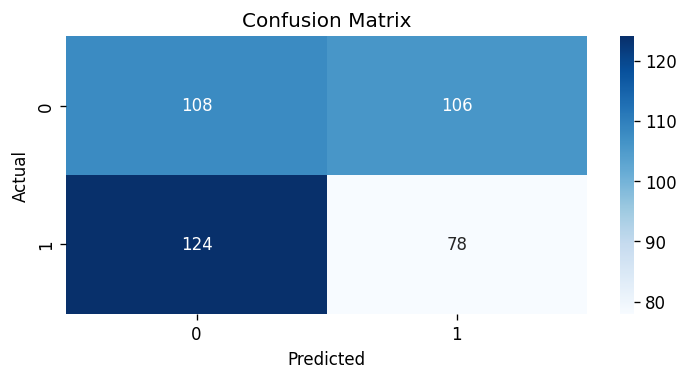

In [41]:
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Vẽ biểu đồ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
#tối ưu xong thấp hơn nên chọn max-depth = 2

#Random Forest for classification

In [43]:
rf = RandomForestClassifier(n_estimators=25,random_state=1) #set ngẫu nhiên n_estimators=25
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.4879807692307692

Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.36      0.42       214
           1       0.48      0.62      0.54       202

    accuracy                           0.49       416
   macro avg       0.49      0.49      0.48       416
weighted avg       0.49      0.49      0.48       416

Confusion Matrix:
[[ 77 137]
 [ 76 126]]


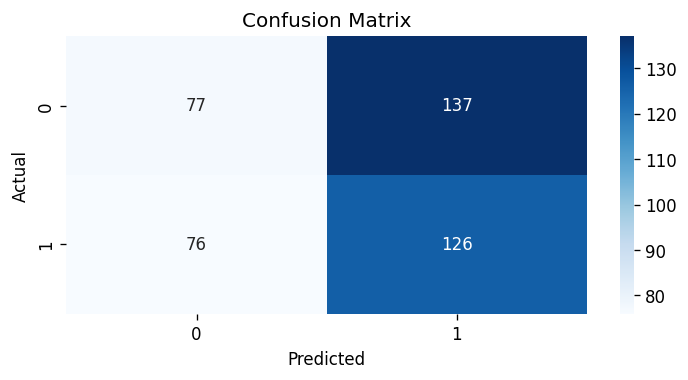

In [44]:
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Vẽ biểu đồ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

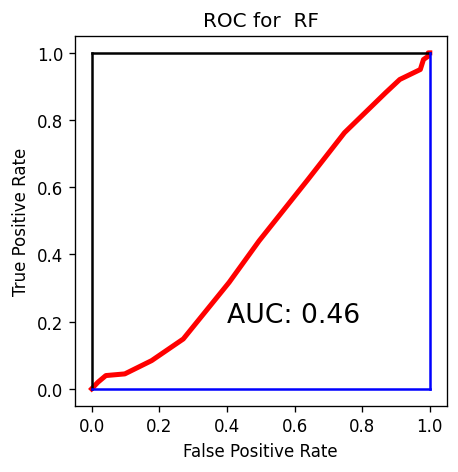

In [45]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = rf.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for  RF')
plt.plot(false_positive_rate, true_positive_rate, linewidth=3, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='b')
plt.plot([1,1],[1,0],c='b')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [46]:
acc=[]
for i in range(1,30):
  rf = RandomForestClassifier(n_estimators=i,random_state=1)
  rf.fit(X_train, y_train)
  y_pred=rf.predict(X_test)
  acc.append(accuracy_score(y_test,y_pred))

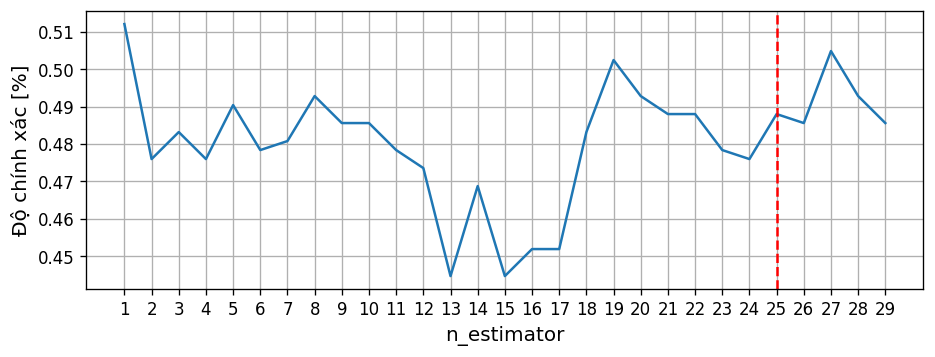

In [47]:
#Vẽ hình thể hiện độ chính xác theo giá trị max_depth
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
plt.ylabel('Độ chính xác [%]',fontsize=12)
plt.xlabel('n_estimator',fontsize=12)
plt.plot(range(1, 30), acc)
plt.xticks(range(1, 30))
plt.axvline(x=25, color='r', linestyle='--')
plt.grid('minor')

In [48]:
#hyperparameter turning
#from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
grid_space = {'max_depth':[1,3, 5, 10,15, 20, None],
              'n_estimators':[2, 5, 9, 10, 15, 20, 30],
              'criterion':['gini','entropy']
              }
from sklearn.metrics import make_scorer, recall_score
scor = make_scorer(accuracy_score, pos_label=1)
rf_grid = GridSearchCV(rf, param_grid=grid_space, scoring=scor)
model_grid = rf_grid.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
             

In [49]:
model_grid.best_params_

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 2}

In [50]:
y_pred=model_grid.predict(X_test)
accuracy_score(y_test,y_pred)

0.5024038461538461

Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.39      0.45       214
           1       0.49      0.62      0.55       202

    accuracy                           0.50       416
   macro avg       0.51      0.51      0.50       416
weighted avg       0.51      0.50      0.50       416

Confusion Matrix:
[[ 83 131]
 [ 76 126]]


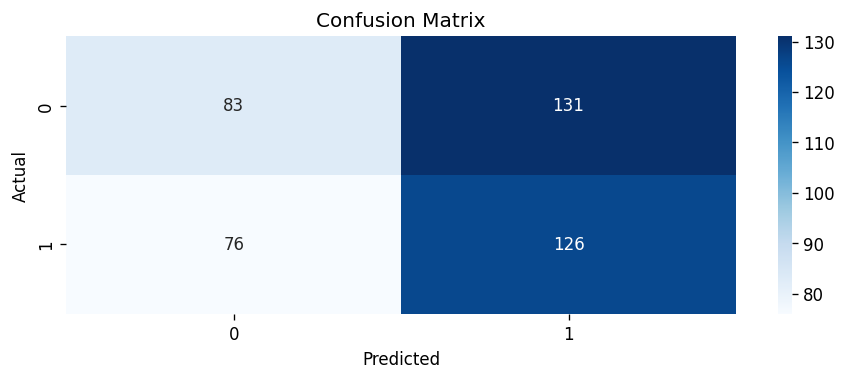

In [51]:
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Vẽ biểu đồ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

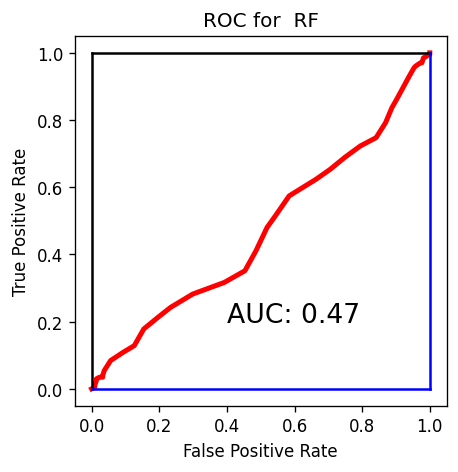

In [52]:
from sklearn.metrics import roc_auc_score,roc_curve

# Re-fit the model if you re-initialized it, or fit it for the first time
rf.fit(X_train, y_train)

y_probabilities = rf.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for  RF')
plt.plot(false_positive_rate, true_positive_rate, linewidth=3, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='b')
plt.plot([1,1],[1,0],c='b')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [53]:
#tối ưu recall class 0

In [54]:
#hyperparameter turning
#from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
grid_space = {'max_depth':[1,3, 5, 10,15, 20, None],
              'n_estimators':[2, 5, 9, 10, 15, 20, 30],
              'criterion':['gini','entropy']
              }
from sklearn.metrics import make_scorer, recall_score
scor = make_scorer(recall_score, pos_label=0,)
rf_grid = GridSearchCV(rf, param_grid=grid_space, scoring=scor)
model_grid = rf_grid.fit(X_train, y_train)

In [55]:
model_grid.best_params_

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 2}

In [56]:
y_pred=model_grid.predict(X_test)
accuracy_score(y_test,y_pred)

0.49759615384615385

Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.71      0.59       214
           1       0.47      0.28      0.35       202

    accuracy                           0.50       416
   macro avg       0.49      0.49      0.47       416
weighted avg       0.49      0.50      0.47       416

Confusion Matrix:
[[151  63]
 [146  56]]


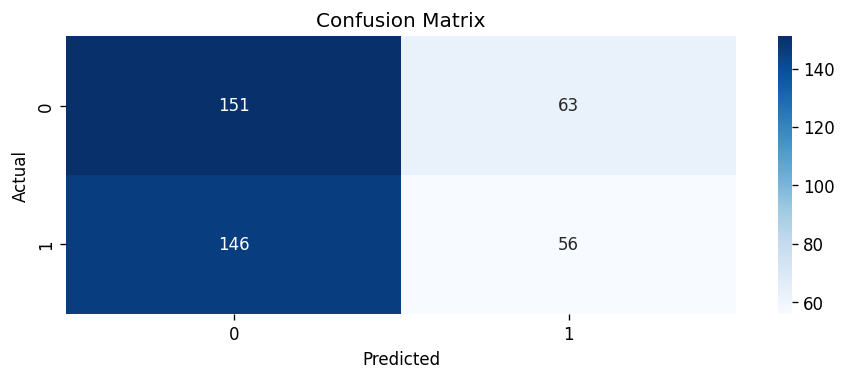

In [57]:
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Vẽ biểu đồ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

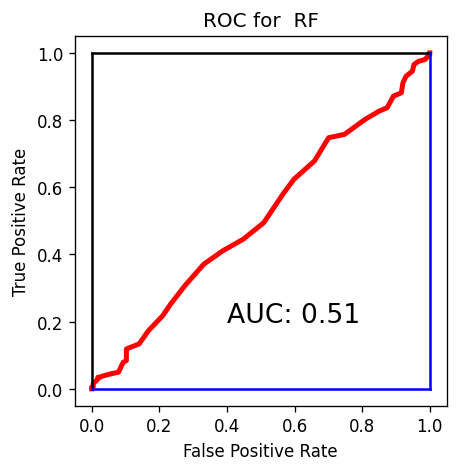

In [58]:
from sklearn.metrics import roc_auc_score,roc_curve

# Re-fit the model if you re-initialized it, or fit it for the first time
rf.fit(X_train, y_train)

y_probabilities = rf.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(4,4))
plt.title('ROC for  RF')
plt.plot(false_positive_rate, true_positive_rate, linewidth=3, color='red')
#plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
plt.plot([0,0],c='b')
plt.plot([1,1],[1,0],c='b')
plt.text(0.4,0.2,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [59]:
#Xác định các yếu tố quan trọng nhất ảnh hưởng đến việc phân loại giai đoạn bệnh
#feature_importances = pd.DataFrame({
    #'Feature': X.columns,
    #'Importance': model_grid.best_estimator_.feature_importances_ # Use the fitted estimator from GridSearchCV
#}).sort_values(by='Importance', ascending=False)
#print(feature_importances)

Sau khi tối ưu các tham số accuracy score, recall class 1 tăng nhưng confusion matrix kém và chênh lệch recall, f1 cao nên giữ nguyên kết quả trước khi tối ưu

#Phân loại với KNN (Sử dụng KNeighborsClassifier)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3) #chọn ngẫu nhiên
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [61]:
#Tính toán độ chính xác
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4951923076923077


Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.41      0.46       214
           1       0.48      0.58      0.53       202

    accuracy                           0.50       416
   macro avg       0.50      0.50      0.49       416
weighted avg       0.50      0.50      0.49       416

Confusion Matrix:
[[ 88 126]
 [ 84 118]]


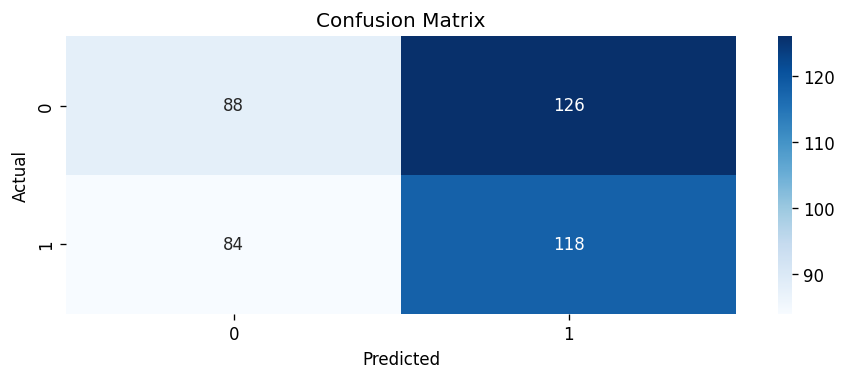

In [62]:
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Vẽ biểu đồ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [63]:
#Thử chọn các giá trị n_neighbors cao hơn xem độ chính xác có được nâng cao hay không
ac=[] #Tạo list rỗng chứa giá trị của độ chính xác
for k in range (2,20,1):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  ac.append(metrics.accuracy_score(y_test, y_pred))
  print("Accuracy at k =",k,metrics.accuracy_score(y_test, y_pred))

Accuracy at k = 2 0.5384615384615384
Accuracy at k = 3 0.4951923076923077
Accuracy at k = 4 0.5216346153846154
Accuracy at k = 5 0.5024038461538461
Accuracy at k = 6 0.5192307692307693
Accuracy at k = 7 0.5
Accuracy at k = 8 0.5504807692307693
Accuracy at k = 9 0.5168269230769231
Accuracy at k = 10 0.5336538461538461
Accuracy at k = 11 0.5192307692307693
Accuracy at k = 12 0.5168269230769231
Accuracy at k = 13 0.5096153846153846
Accuracy at k = 14 0.5096153846153846
Accuracy at k = 15 0.4855769230769231
Accuracy at k = 16 0.49759615384615385
Accuracy at k = 17 0.47596153846153844
Accuracy at k = 18 0.4879807692307692
Accuracy at k = 19 0.5


In [64]:
len(ac)

18

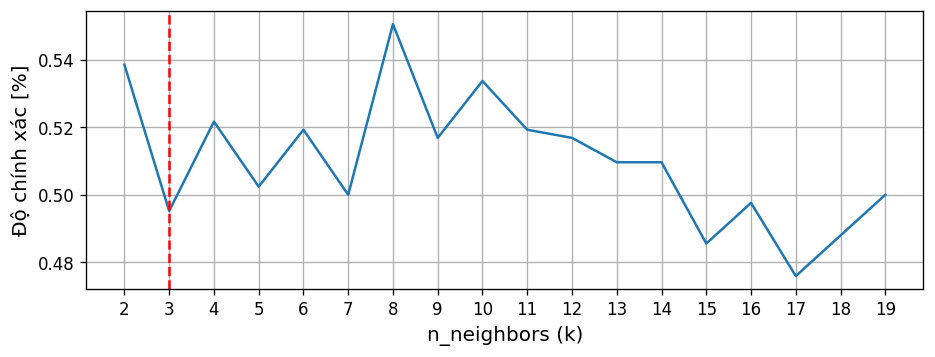

In [65]:
#Vẽ hình thể hiện độ chính xác theo giá trị n_neighbors
plt.ylabel('Độ chính xác [%]',fontsize=12)
plt.xlabel('n_neighbors (k)',fontsize=12)
plt.plot(range(2, 20), ac)
plt.xticks(range(2, 20))
plt.axvline(x=3, color='r', linestyle='--')
plt.grid('minor')
#Có thể chọn n_neighbors bằng 8

In [66]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.61      0.58       214
           1       0.54      0.49      0.51       202

    accuracy                           0.55       416
   macro avg       0.55      0.55      0.55       416
weighted avg       0.55      0.55      0.55       416

Confusion Matrix:
[[131  83]
 [104  98]]


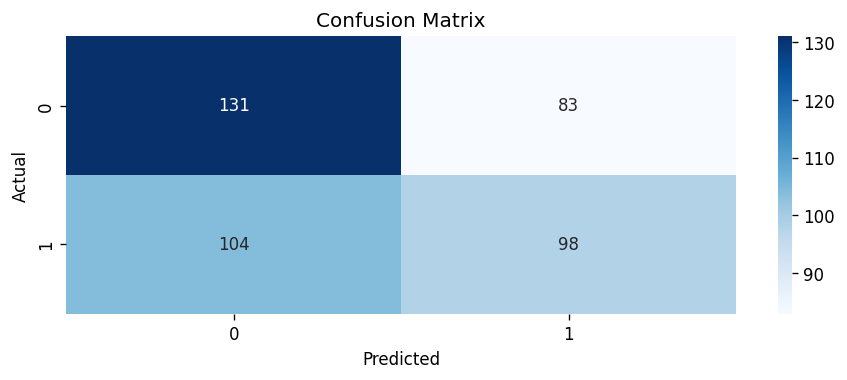

In [67]:
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Vẽ biểu đồ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Phân loại với Support Vector Machine

In [68]:
#Xây dựng mô hình
from sklearn.svm import SVC
model = SVC() #kernel='linear', C= 0.001, gamma=0.1) chạy tham số mặc định do ko chạy được vì runtime quá dài
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [69]:
#Đánh giá độ chính xác của mô hình
from sklearn import metrics
from sklearn.metrics import classification_report
metrics.accuracy_score(y_test, y_pred)

0.4831730769230769

Accuracy: 0.48
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.32      0.39       214
           1       0.48      0.65      0.55       202

    accuracy                           0.48       416
   macro avg       0.49      0.49      0.47       416
weighted avg       0.49      0.48      0.47       416

Confusion Matrix:
[[ 69 145]
 [ 70 132]]


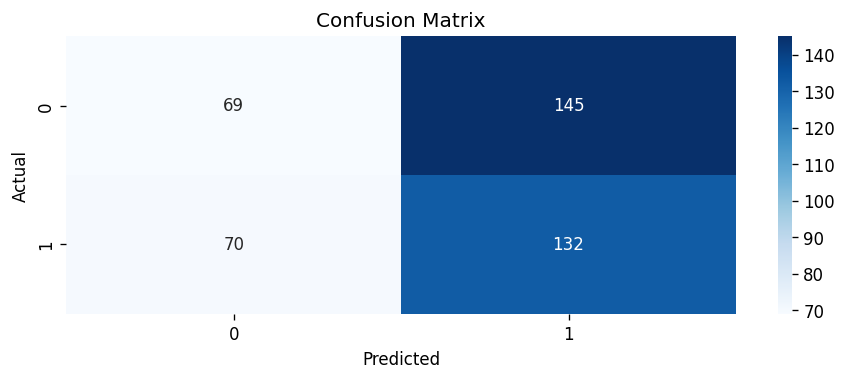

In [70]:
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Vẽ biểu đồ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [71]:
#Nâng cao độ chính xác của mô hình với grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV #RandomizedSearchCV

In [72]:
#Tìm kiếm hyperparameter (C=[0.001, +], gamma=[>0,1])
hps={
    'C': [0.01, 0.1, 1],
    'gamma' : [0.1, 1,10],
    'kernel' : ['linear']#, 'poly', 'rbf', 'sigmoid'],
} #chỉ chay linear do mô hình nặng, chạy lâu, có thể chạy thêm poly, rbf, sigmoid
grids= GridSearchCV(SVC(),hps)

In [73]:
grids.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear']})

In [74]:
grids.best_params_

{'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}

In [75]:
grids.best_estimator_

SVC(C=0.01, gamma=0.1, kernel='linear')

In [76]:
y_pred=grids.predict(X_test)

Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.21      0.30       214
           1       0.49      0.79      0.60       202

    accuracy                           0.50       416
   macro avg       0.51      0.50      0.45       416
weighted avg       0.51      0.50      0.45       416

Confusion Matrix:
[[ 46 168]
 [ 42 160]]


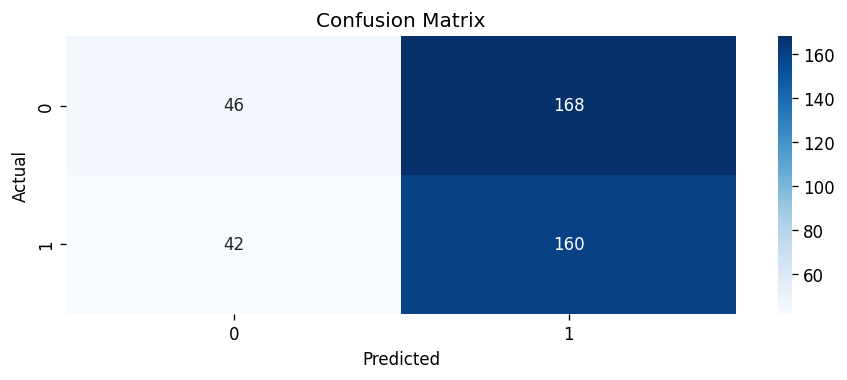

In [77]:
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Vẽ biểu đồ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#GaussianNB


In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
y = df['Fibrosis_Group'] # Replace 'Baselinehistological_staging' with the actual target variable column name if different
X = X_scaled
#Chia dữ liệu thành training set và test set
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia data thành train và test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # Chia dữ liệu với 30% số lượng là tets và 70% số lượng là training

In [80]:
# Khởi tạo model Gaussian Naive Bayes
gnb = GaussianNB()

# Huấn luyện mô hình
gnb.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = gnb.predict(X_test)


Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.32      0.39       214
           1       0.48      0.67      0.56       202

    accuracy                           0.49       416
   macro avg       0.49      0.50      0.48       416
weighted avg       0.50      0.49      0.47       416

Confusion Matrix:
[[ 69 145]
 [ 67 135]]


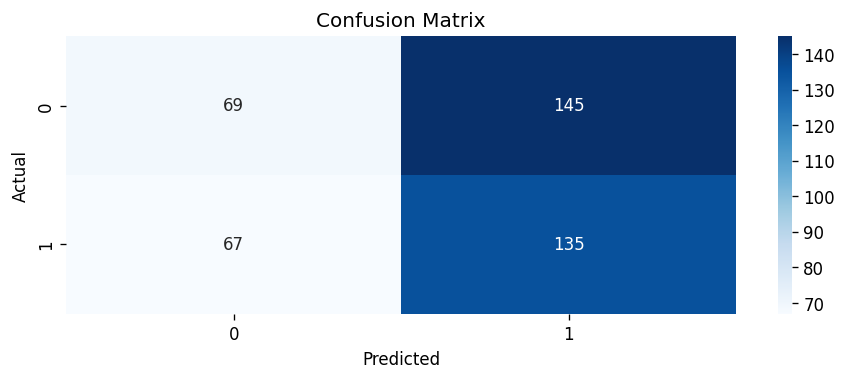

In [81]:
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Vẽ biểu đồ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#xgboost

In [82]:
import xgboost as xgb
from xgboost import XGBClassifier
Xg = xgb.XGBClassifier()
Xg.fit(X_train, y_train)
accuracy_xg = Xg.score(X_test, y_test)
print("Accuracy: {:.2f}".format(accuracy_xg))

Accuracy: 0.51


In [83]:
y_pred=Xg.predict(X_test)

Accuracy: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.42      0.47       214
           1       0.50      0.61      0.55       202

    accuracy                           0.51       416
   macro avg       0.52      0.51      0.51       416
weighted avg       0.52      0.51      0.51       416

Confusion Matrix:
[[ 90 124]
 [ 79 123]]


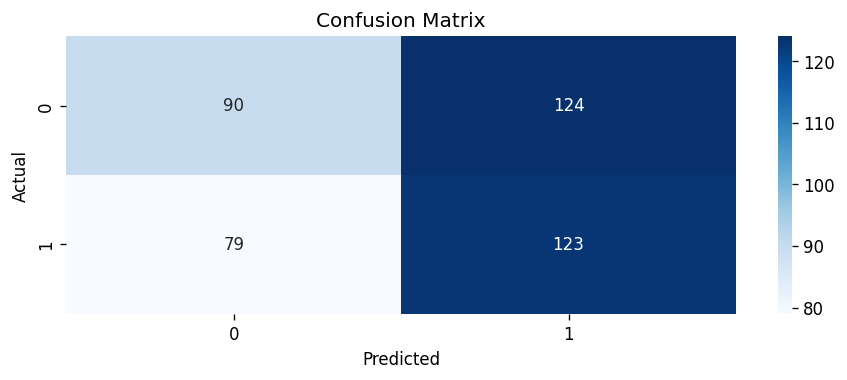

In [84]:
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Vẽ biểu đồ ma trận nhầm lẫn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#TỔNG HỢP MÔ HÌNH

In [85]:
precision=[]
recall=[]
f1=[]
time=[]
name=[]

In [86]:
models = [LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    xgb.XGBClassifier()
    ]

In [87]:
for model in models: #Duyệt qua danh sách các mô hình trong models
  t1 = datetime.datetime.now()
  model_name = model.__class__.__name__
  model.fit(X_train, y_train)
  t2= datetime.datetime.now()
  d = round((t2-t1).microseconds/1000,1) #Tính thời gian
  y_pred = model.predict(X_test)
  pre = round(precision_score(y_test, y_pred,average='micro'),3)
  rec = round(recall_score(y_test, y_pred,average='micro'),3)
  f1_=round(f1_score(y_test, y_pred,average='micro'),3)
  precision.append(pre)
  recall.append(rec)
  f1.append(f1_)
  time.append(d)
  name.append(model_name)

In [88]:
#Đưa kết quả thành một bảng tổng hợp.
Results = pd.DataFrame(np.column_stack([name, precision, recall,f1,time]),columns=['Name', 'Precision','Recall','F1-score','Time (s)'])
Results

,Name,Precision,Recall,F1-score,Time (s)
0,LogisticRegression,0.502,0.502,0.502,5.3
1,DecisionTreeClassifier,0.512,0.512,0.512,27.9
2,RandomForestClassifier,0.471,0.471,0.471,430.9
3,KNeighborsClassifier,0.502,0.502,0.502,1.4
4,SVC,0.483,0.483,0.483,46.3
5,GaussianNB,0.49,0.49,0.49,1.9
6,XGBClassifier,0.512,0.512,0.512,176.9
